In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#np.random.seed(42)

## Aufgabenteil a){-}

Die Energieverteilung wird invertiert, sodass sie anschliessend über gleichverteilte Werte für $10^5$ Ereignisse simuliert werden kann. Danach wird sie in der hdf5-Datei abgespeichert.

In [2]:
verteilung = []
t_f_folge = []
i = 0
normalverteilung = []


uniform_a = np.random.uniform(0, 1, 100000)

def inv_Energie(E):
    return ((2.7-1)/E)**(1/2.7)

energy = inv_Energie(uniform_a)
Energy = pd.DataFrame(energy)
Energy.to_hdf('NeutrinoMC.hdf5', key='Energy')

## Aufgabenteil b){-}
Mithilfe des Neumannschen Rückweisungsverfahren wird eine Akzeptanzmaske erstellt und abgespeichert.

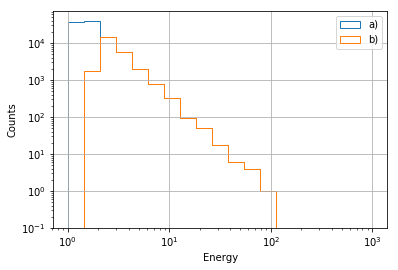

In [3]:
def P(Energy):
    return (1 - np.exp(-Energy / 2))**3


for  i in range(0,len(uniform_a)):
    if uniform_a[i] < P(inv_Energie(uniform_a[i])):
        verteilung.append(inv_Energie(uniform_a[i]))
        t_f_folge.append('True')
    else:
        t_f_folge.append('False')

AcceptanceMask = pd.DataFrame(t_f_folge)
AcceptanceMask.to_hdf('NeutrinoMC.hdf5', key='AcceptanceMask')

plt.grid()
xaxis = np.logspace(0,3,20)
plt.hist(energy, bins=xaxis, log=True, histtype='step', label='a)')
plt.hist(verteilung, bins=xaxis, log=True, histtype='step', label='b)')
plt.xscale('log')
plt.ylabel(r'Counts')
plt.xlabel(r'Energy')
plt.legend()
plt.show()

## Aufgabenteil c){-}
Die Normalverteilung wird erstellt und auf die Werte aus b) geworfen

C:\Users\maxkr\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':
C:\Users\maxkr\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.
C:\Users\maxkr\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in sqrt
  app.launch_new_instance()
C:\Users\maxkr\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in sqrt


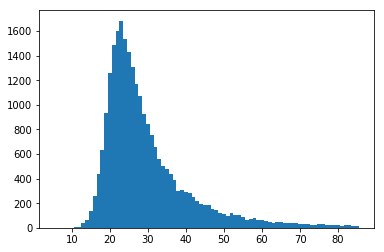

In [4]:

uni1 = np.random.uniform(0, 1, int(len(verteilung)/2))
uni2 = np.random.uniform(1, 2, int(len(verteilung)/2))
uni2 = uni2 - 1
for  i in range(0,len(uni1)):
    v_1 = 2*uni1[i] - 1
    v_2 = 2*uni2[i] - 1
    s = v_1**2 + v_2**2            
    x1 = v_1 * np.sqrt((-2/s)*np.log(s))
    x2 = v_2 * np.sqrt((-2/s)*np.log(s))
    while s >= 1:
        nachziehen = np.random.uniform(0, 1, 2)
        v_1 = 2*nachziehen[0] - 1
        v_2 = 2*nachziehen[1] - 1
        s = v_1**2 + v_2**2
        x1 = v_1 * np.sqrt((-2/s)*np.log(s))
        x2 = v_2 * np.sqrt((-2/s)*np.log(s))
    norver = (np.sqrt(2)*x1 + 10)*verteilung[i]
    if norver >=0:
        if norver%1<0.5: 
            normalverteilung.append(int(norver))
        else: 
            normalverteilung.append(int(norver)+1)
    norver = (np.sqrt(2)*x2+10)*verteilung[int(len(verteilung)/2)+i]
    if norver >=0:
        if norver%1<0.5: 
            normalverteilung.append(int(norver))
        else: 
            normalverteilung.append(int(norver)+1)

x=np.linspace(5.5,85.5,81)
plt.hist(normalverteilung,bins=x)
plt.show()

## Aufgabenteil d){-}

Die 2D normalverteilung wird erstellt. Dabei wird im ersten Plot davon ausgegangen, dass das Detektorfeld aus 10 mal 10 Detektoren bestand. Im 2. Plot ist die Auflösung ver-10-facht. Danach wurden die Ergebnisse aus c) und d) im DataFrame Signal abgespeichert.

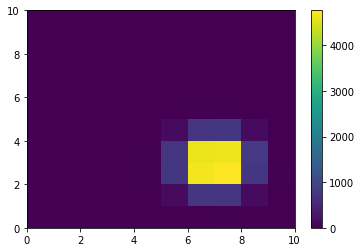

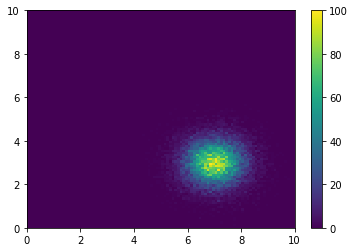

In [5]:
x=[]
for i in normalverteilung:
    x.append(np.random.normal(7,1/np.log10(i+1)))
    while x[-1]<0 or x[-1]>10:
        x[-1]=np.random.normal(7,1/np.log10(i+1))
y=[]
for i in normalverteilung:
    y.append(np.random.normal(3,1/np.log10(i+1)))
    while y[-1]<0 or y[-1]>10:
        y[-1]=np.random.normal(3,1/np.log10(i+1))

plt.hist2d(x,y,bins=[[0,1,2,3,4,5,6,7,8,9,10],[0,1,2,3,4,5,6,7,8,9,10]])
plt.colorbar()
plt.show()
xaxis=np.linspace(0,10,101)
plt.hist2d(x,y,bins=[xaxis,xaxis])
plt.colorbar()
plt.show()

Signal=pd.DataFrame({'NumberOfHits':normalverteilung,'x':x,'y':y})
Signal.to_hdf('NeutrinoMC.hdf5', key='Signal')

## Aufgabenteil e){-}

Der Untergrund wird nach den Vorgaben erstellt. In der 1. Abbildung ist die Verteilung auf dem Detektorfeld ohne Signal zu erkennen, in der 2. Abbildung wurde das Signal dem Untergrund hinzugefügt. Es ergibt sich kein merklicher Unterschied. In der 3. Abbildung ist zu erkennen, das der Logarithmus der Untergrundhits der geforderten Normalverteilung entspricht. Die Effekte auf der linken Seite sind durch die Rundung der Hitzahlen auf ganze Zahlen zu erklären, was im $10^0$ Bereich noch einen sehr hohen Einfluss hat. Vergleicht man die 4. Abbildung mit der Signalverteilung, so ist hier sehr einfach zu erkennen, dass das Signal unter dem Untergrund verschwindet.
In der letzten Abbildun ist in rot das Signal und in blau der Hintergrund dargestellt. Die Daten werden im Background-Key abgespeichert.

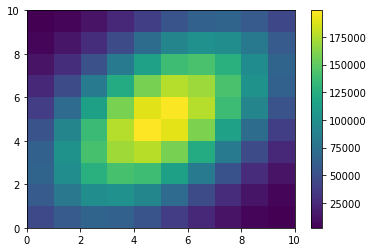

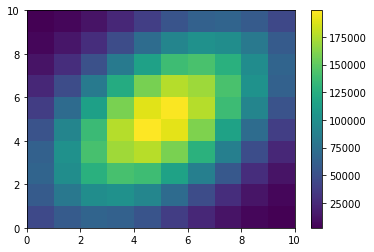

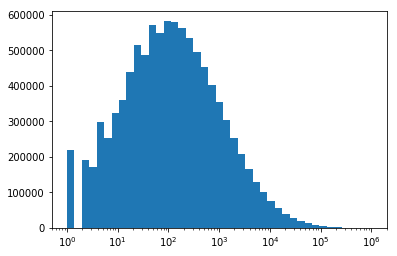

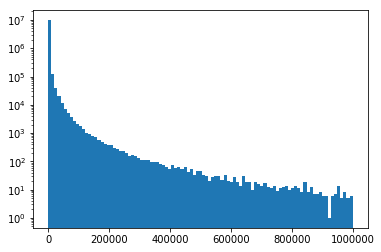

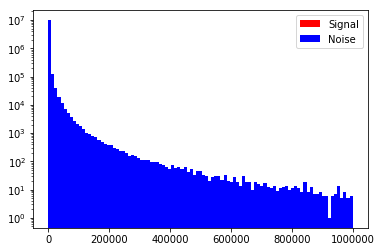

In [6]:
numberOfHits = np.power(10,np.random.normal(2,1,10000000))
for i in range(0,len(numberOfHits)-1):
    numberOfHits[i]=int(numberOfHits[i])
x_stern = np.random.normal(0,1,10000000)
y_stern = np.random.normal(0,1,10000000)
s=3
r=0.5
u=5
xunter = np.sqrt(1-r**2)*s*x_stern+r*s*y_stern+u
yunter = s*y_stern+u

Untergrund=pd.DataFrame({'NumberOfHits':numberOfHits,'x':xunter,'y':yunter})
Untergrund.to_hdf('NeutrinoMC.hdf5', key='Background')

plt.hist2d(xunter,yunter,bins=[[0,1,2,3,4,5,6,7,8,9,10],[0,1,2,3,4,5,6,7,8,9,10]])
plt.colorbar()
plt.show()
plt.hist2d(np.concatenate((x, xunter), axis=None),
           np.concatenate((y, yunter), axis=None),
           bins=[[0,1,2,3,4,5,6,7,8,9,10],[0,1,2,3,4,5,6,7,8,9,10]])
plt.colorbar()
plt.show()
xaxis = np.logspace(0,6,42)
plt.hist(numberOfHits,bins=xaxis)
plt.xscale('log')
plt.show()
xaxis = np.linspace(0,1000000,100)
plt.hist(numberOfHits,bins=xaxis,log=True)
plt.show()
plt.hist(np.concatenate((normalverteilung,numberOfHits),axis=None),
         bins=xaxis,log=True,color='r',label='Signal')
plt.hist(numberOfHits,bins=xaxis,log=True,color='b',label='Noise')
plt.legend()
plt.show()
